<a href="https://colab.research.google.com/github/poojabisht10/Simulation-ml-simpy/blob/main/Simulation_ml_simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

np.random.seed(42)

In [ ]:
def service_process(env, service_rate, results):
    service_time = np.random.exponential(1 / service_rate)
    yield env.timeout(service_time)
    results.append(service_time)

In [ ]:
def run_simulation(arrival_rate, service_rate, sim_time=10):
    env = simpy.Environment()
    results = []

    for _ in range(int(arrival_rate * sim_time)):
        env.process(service_process(env, service_rate, results))

    env.run(until=sim_time)
    return np.mean(results)

In [ ]:
N = 1000

X = []
y = []

for _ in range(N):
    arrival_rate = np.random.uniform(1, 10)
    service_rate = np.random.uniform(5, 20)

    avg_service_time = run_simulation(arrival_rate, service_rate)

    X.append([arrival_rate, service_rate])
    y.append(avg_service_time)

X = np.array(X)
y = np.array(y)

In [ ]:
data = pd.DataFrame(X, columns=["ArrivalRate", "ServiceRate"])
data["AvgServiceTime"] = y

data.head()

,ArrivalRate,ServiceRate,AvgServiceTime
0,4.370861,19.260715,0.043018
1,6.962701,9.675666,0.098653
2,8.233049,7.798551,0.126404
3,6.778285,6.262099,0.176394
4,3.642327,17.140417,0.055037


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(
    results, columns=["Model", "RMSE", "MAE", "R2"]
)

results_df

,Model,RMSE,MAE,R2
0,Linear Regression,0.020648,0.015280,0.713954
1,KNN,0.018063,0.012095,0.781105
2,SVM,0.061885,0.057623,-1.569526
3,Decision Tree,0.023915,0.016247,0.616265
4,Random Forest,0.017977,0.011990,0.783174
5,Gradient Boosting,0.016983,0.011480,0.806483


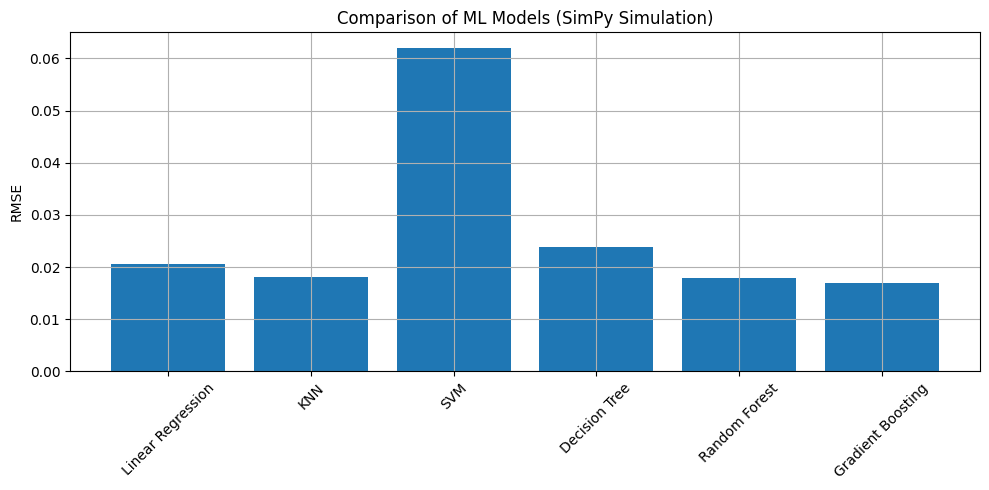

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.title("Comparison of ML Models (SimPy Simulation)")
plt.grid(True)
plt.tight_layout()

# Save figure
plt.savefig("rmse_comparison.png", dpi=300)
plt.show()

In [ ]:
best_model = results_df.loc[results_df["RMSE"].idxmin()]
best_model

,5
Model,Gradient Boosting
RMSE,0.016983
MAE,0.01148
R2,0.806483
